In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn

In [106]:
csv_path = "/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/ML/Test/Copy Dataset/Diabetes_Final_Data_V21.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [107]:
df.shape

(5437, 15)

In [108]:
df.columns

Index(['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose',
       'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke', 'diabetic'],
      dtype='object')

In [109]:
df.isnull()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [111]:
df.isnull().sum().sum()

np.int64(0)

In [65]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


<Axes: xlabel='age'>

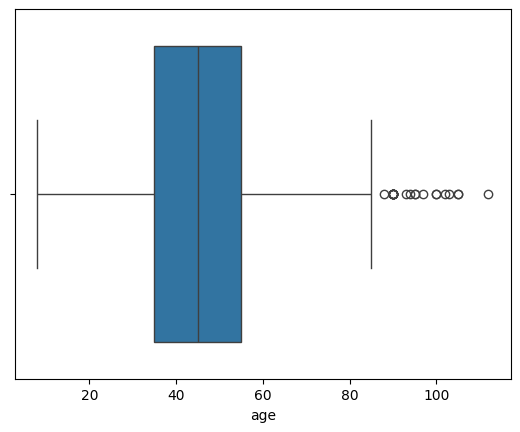

In [112]:
sns.boxplot(x=df['age'])

In [113]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [67]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [68]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

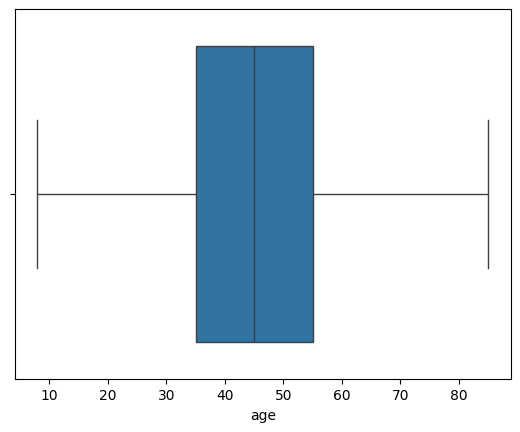

In [69]:
df = non_outliers
sns.boxplot(x=df['age'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.loc[:, 'gender'] = le.fit_transform(df['gender'])
df.loc[:, 'diabetic'] = le.fit_transform(df['diabetic'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [118]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
1043,25,0,60,128,89,6.03,1.50,41.0,18.26,0,0,0,0,0,0
2631,60,0,78,197,105,8.50,1.52,42.0,18.08,0,0,0,0,0,0
3579,30,0,75,127,84,8.07,1.52,54.0,23.25,0,0,0,0,0,1
344,70,0,88,143,74,19.89,1.47,52.5,24.19,0,0,0,0,0,1
963,42,1,67,121,74,7.82,1.60,57.9,22.61,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,32,0,77,132,105,8.50,1.50,44.5,19.81,0,0,0,0,0,0
1793,55,0,78,129,85,9.88,1.57,53.0,21.37,0,0,0,0,0,0
2670,58,0,72,129,75,6.11,1.50,45.0,20.04,0,0,0,0,0,0
4201,79,0,96,142,80,12.00,1.52,50.0,21.64,0,1,0,0,0,1


In [119]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,1043,25,0,60,128,89,6.03,1.50,41.0,18.26,0,0,0,0,0,0
1,2631,60,0,78,197,105,8.50,1.52,42.0,18.08,0,0,0,0,0,0
2,3579,30,0,75,127,84,8.07,1.52,54.0,23.25,0,0,0,0,0,1
3,344,70,0,88,143,74,19.89,1.47,52.5,24.19,0,0,0,0,0,1
4,963,42,1,67,121,74,7.82,1.60,57.9,22.61,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,4596,32,0,77,132,105,8.50,1.50,44.5,19.81,0,0,0,0,0,0
5433,1793,55,0,78,129,85,9.88,1.57,53.0,21.37,0,0,0,0,0,0
5434,2670,58,0,72,129,75,6.11,1.50,45.0,20.04,0,0,0,0,0,0
5435,4201,79,0,96,142,80,12.00,1.52,50.0,21.64,0,1,0,0,0,1


In [120]:
x = df.drop(columns = ['diabetic','index']) # feature 
y = df['diabetic'] # target 

In [121]:
x.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
0,25,0,60,128,89,6.03,1.50,41.0,18.26,0,0,0,0,0
1,60,0,78,197,105,8.50,1.52,42.0,18.08,0,0,0,0,0
2,30,0,75,127,84,8.07,1.52,54.0,23.25,0,0,0,0,0
3,70,0,88,143,74,19.89,1.47,52.5,24.19,0,0,0,0,0
4,42,1,67,121,74,7.82,1.60,57.9,22.61,0,0,0,0,0


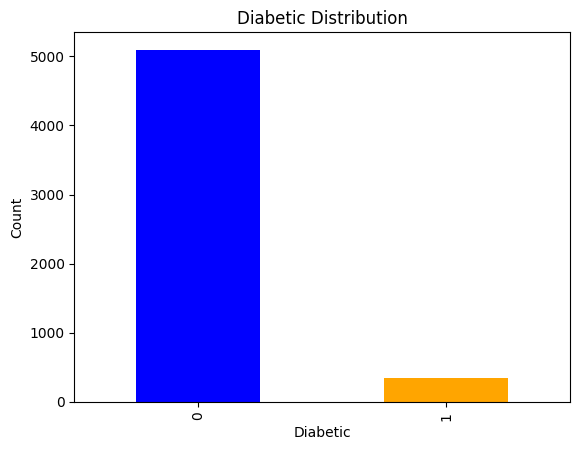

In [122]:
df['diabetic'].value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [123]:
class_counts = y.value_counts()
class_counts

diabetic
0    5093
1     344
Name: count, dtype: int64

In [124]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    93.672981
1     6.327019
Name: count, dtype: float64

In [125]:
y_train = y_train.astype(int)

y_train

692     0
4725    0
4525    0
3639    0
4954    0
       ..
2721    0
3333    0
1183    0
3411    0
5300    0
Name: diabetic, Length: 4331, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


print("train data size", len(x_train))
print("train data size", len(y_train))

print("test data size", len(x_test))
print("test data size", len(y_test))


train data size 4349
train data size 4349
test data size 1088
test data size 1088


In [127]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Convert y_train to integer if needed
y_train = y_train.astype(int)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution after SMOTE: Counter({0: 4072, 1: 1221})


In [144]:
class_counts = y_train_resampled.value_counts()
class_counts

diabetic
0    4072
1    1221
Name: count, dtype: int64

In [145]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    76.931797
1    23.068203
Name: count, dtype: float64

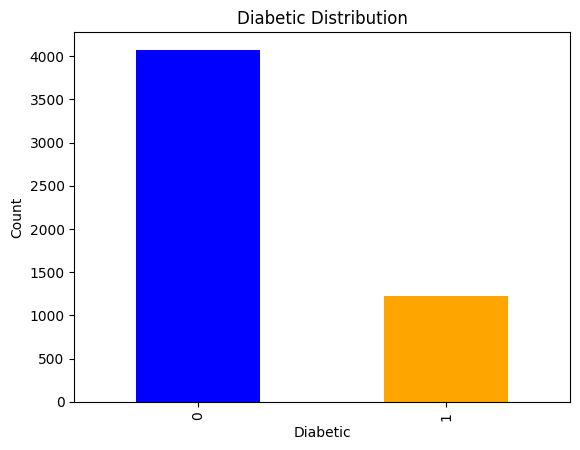

In [147]:
y_train_resampled.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [128]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()  
std_scaled_x = std_scaler.fit_transform(x)  

std_scaled_x

array([[-1.43393732, -0.63946402, -1.36455893, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [ 1.0102244 , -0.63946402,  0.10017212, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [-1.08477136, -0.63946402, -0.14394972, ..., -0.20290876,
        -0.10827332, -0.06076249],
       ...,
       [ 0.87055801, -0.63946402, -0.38807156, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [ 2.33705504, -0.63946402,  1.56490317, ..., -0.20290876,
        -0.10827332, -0.06076249],
       [ 0.03255971, -0.63946402, -0.38807156, ..., -0.20290876,
        -0.10827332, -0.06076249]], shape=(5437, 14))

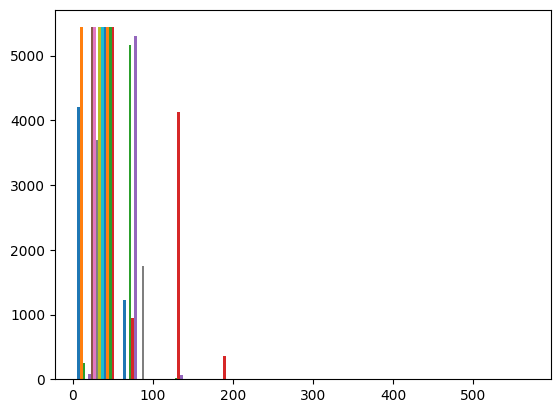

In [129]:
plt.hist(x)
plt.show()

In [130]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()  # Corrected the typo here
m_scaled_x = m_scaler.fit_transform(x)  # Assuming 'x' is your input data

m_scaled_x

array([[0.16346154, 0.        , 0.4296875 , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.5703125 , ..., 0.        , 0.        ,
        0.        ],
       [0.21153846, 0.        , 0.546875  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48076923, 0.        , 0.5234375 , ..., 0.        , 0.        ,
        0.        ],
       [0.68269231, 0.        , 0.7109375 , ..., 0.        , 0.        ,
        0.        ],
       [0.36538462, 0.        , 0.5234375 , ..., 0.        , 0.        ,
        0.        ]], shape=(5437, 14))

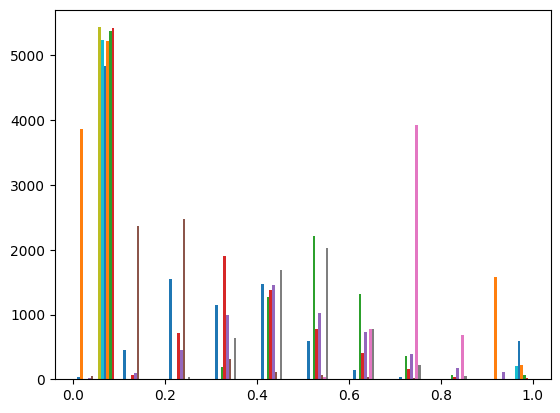

In [131]:
plt.hist(m_scaled_x)
plt.show()

In [132]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()  
robust_scaled_x = robust_scaler.fit_transform(x)  

robust_scaled_x


array([[-1.        ,  0.        , -1.06666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75      ,  0.        ,  0.13333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.75      ,  0.        , -0.06666667, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.65      ,  0.        , -0.26666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7       ,  0.        ,  1.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05      ,  0.        , -0.26666667, ...,  0.        ,
         0.        ,  0.        ]], shape=(5437, 14))

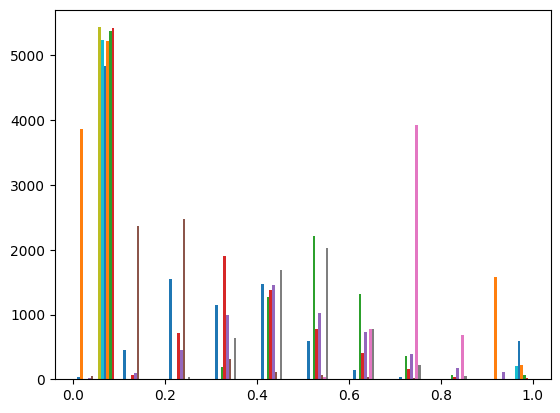

In [133]:
plt.hist(m_scaled_x)
plt.show()

In [134]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [135]:
dt_pred = dt_clf.predict(x_test)
dt_pred 

array([0, 0, 0, ..., 0, 0, 0], shape=(1088,))

In [138]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
cm

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [142]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1088 entries, 1310 to 2684
Series name: diabetic
Non-Null Count  Dtype 
--------------  ----- 
1088 non-null   object
dtypes: object(1)
memory usage: 17.0+ KB
